In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
#import STIX_interactiveQL as istx
#import STIX_QL as stxql
#import RPW_interactiveQL as irpw
import RPW_STIX_pylab as sololab
#import rpw_freqdrift as freqdrift
import datetime as dt
from astropy.time.core import Time




 # folder paths
RPW_folder= "../RPW/CDF/"
STIX_folder="../STIX/stx_files/"


#RPW indexes
# suggested  indexes : Antonio vecchio

#OLD
#IDX_SELECTED_FREQS=[437,441,442,448,453,458,465,470,477,482,493,499,511,519,526,533,538,545,552,559,566,576,588,592,600,612,629,649,656,673,678,696,703,716,727,734,741,750,755]
#,505 is poluted

#NEW
#IDX_SELECTED_FREQS=[437,441,442,448,453,458,465,470,477,482,493,499,511,519,526,533,538,545,552,559,566,576,588,592,600,612,678,696,703,727,716,734,741,750,755]
#,505 is poluted ,,629,649,673,703,727,656


#idx_0=436
#selected_indexes = np.array(IDX_SELECTED_FREQS)-idx_0


# Event 2021-11-01 01:22

In [16]:
# 20NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20211101/solo_L1A_stix-sci-xray-l1-2111010024_20211101T010049-20211101T023158_017507_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202111_BKG/solo_L1A_stix-sci-xray-l1-2111010016_20211101T100013-20211101T114013_017219_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202111/solo_L2_rpw-hfr-surv-cdag_20211101_V03.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "01-Nov-2021 01:14:00"
end_time = "01-Nov-2021 01:54:00"

# RPW BKG
start_bkg = "01-Nov-2021 01:00:00"
end_bkg = "01-Nov-2021 01:20:00"




# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]

time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,17000],rpw_bkg_interval=bkg_range)



Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2111010024_20211101T010049-20211101T023158_017507_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2111010016_20211101T100013-20211101T114013_017219_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20211101_V03.cdf
  Type: RPW L2
  sensors:  (840378,) (0,)
  data cropped from  2021-11-01 01:14:00  to  2021-11-01 01:54:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 4875 5225 5475 5825 6175 6525 6875 7375 7975 8175 8575 9175 12475 13375 13725 14925 14375 15275 15625 16075 16325
  Creating mean bkg from  01-Nov-2021 01:00:00  to  01-Nov-2021 01:20:00 ...
  bkg done.


Time axis constrained to common time interval...
Time interval from 01-Nov-2021 01:14:01  to  01-Nov-2021 01:53:40


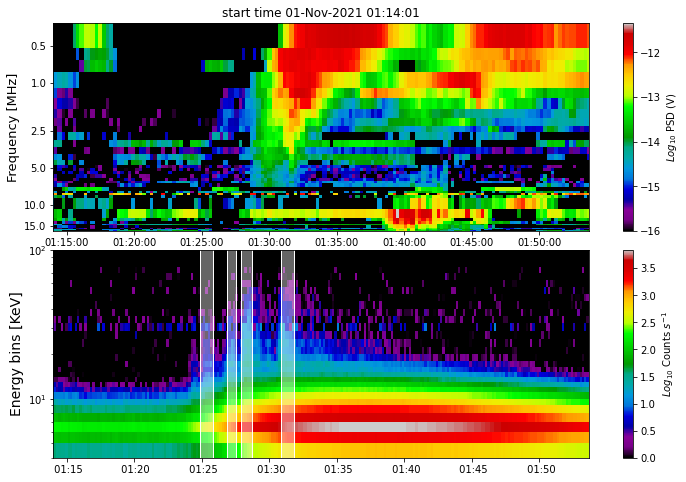

In [28]:
solar_events=[]
solar_events.append(sololab.solar_event("interval",times={"start":"01-Nov-2021 01:24:50","end":"01-Nov-2021 01:25:50"},paint_in="stix",linewidth=1,hl_alpha=0.4))
solar_events.append(sololab.solar_event("interval",times={"start":"01-Nov-2021 01:26:50","end":"01-Nov-2021 01:27:30"},paint_in="stix",linewidth=1,hl_alpha=0.4))
solar_events.append(sololab.solar_event("interval",times={"start":"01-Nov-2021 01:27:55","end":"01-Nov-2021 01:28:45"},paint_in="stix",linewidth=1,hl_alpha=0.4))
solar_events.append(sololab.solar_event("interval",times={"start":"01-Nov-2021 01:30:50","end":"01-Nov-2021 01:31:45"},paint_in="stix",linewidth=1,hl_alpha=0.4))


sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,100],figsize=[12,8],
                               rpw_cmap="nipy_spectral",stix_cmap="nipy_spectral",events=solar_events)
                               #markers=markerlines,markerwidth=2)
plt.yscale('log')

Estimated uncertainty:
  Time: 8.0 s
  Freq: between -275.0-1650.0 kHz
Defining time reference...
 t0 =  01-Nov-2021 01:25:55
Fitting peaks for 8 frequencies between 1225.0 kHz and 3525.0 kHz
Starting point ---------- frequency: 3525+-175 kHz   time: 01-Nov-2021 01:26:11
[7] 3525 kHz: Fit found!   t-t0: 16.84 s   Dif.: 0.00 s  Log10(RMSE): -15.72  Log10(S/N): 0.47
[6] 3225 kHz: Fit found!   t-t0: 16.71 s   Dif.: -0.13 s  Log10(RMSE): -26.29  Log10(S/N): -10.20
[5] 2675 kHz   : Not in bounds! omitted.
[4] 2425 kHz: Fit found!   t-t0: 37.12 s   Dif.: 20.41 s  Log10(RMSE): -15.57  Log10(S/N): 1.06
[3] 2075 kHz: Fit found!   t-t0: 49.22 s   Dif.: 12.10 s  Log10(RMSE): -15.44  Log10(S/N): 0.41
[2] 1825 kHz: Fit found!   t-t0: 59.73 s   Dif.: 10.51 s  Log10(RMSE): -15.81  Log10(S/N): 1.42
[1] 1475 kHz: Fit found!   t-t0: 59.98 s   Dif.: 0.25 s  Log10(RMSE): -15.55  Log10(S/N): 1.83
[0] 1225 kHz   : Not in bounds! omitted.


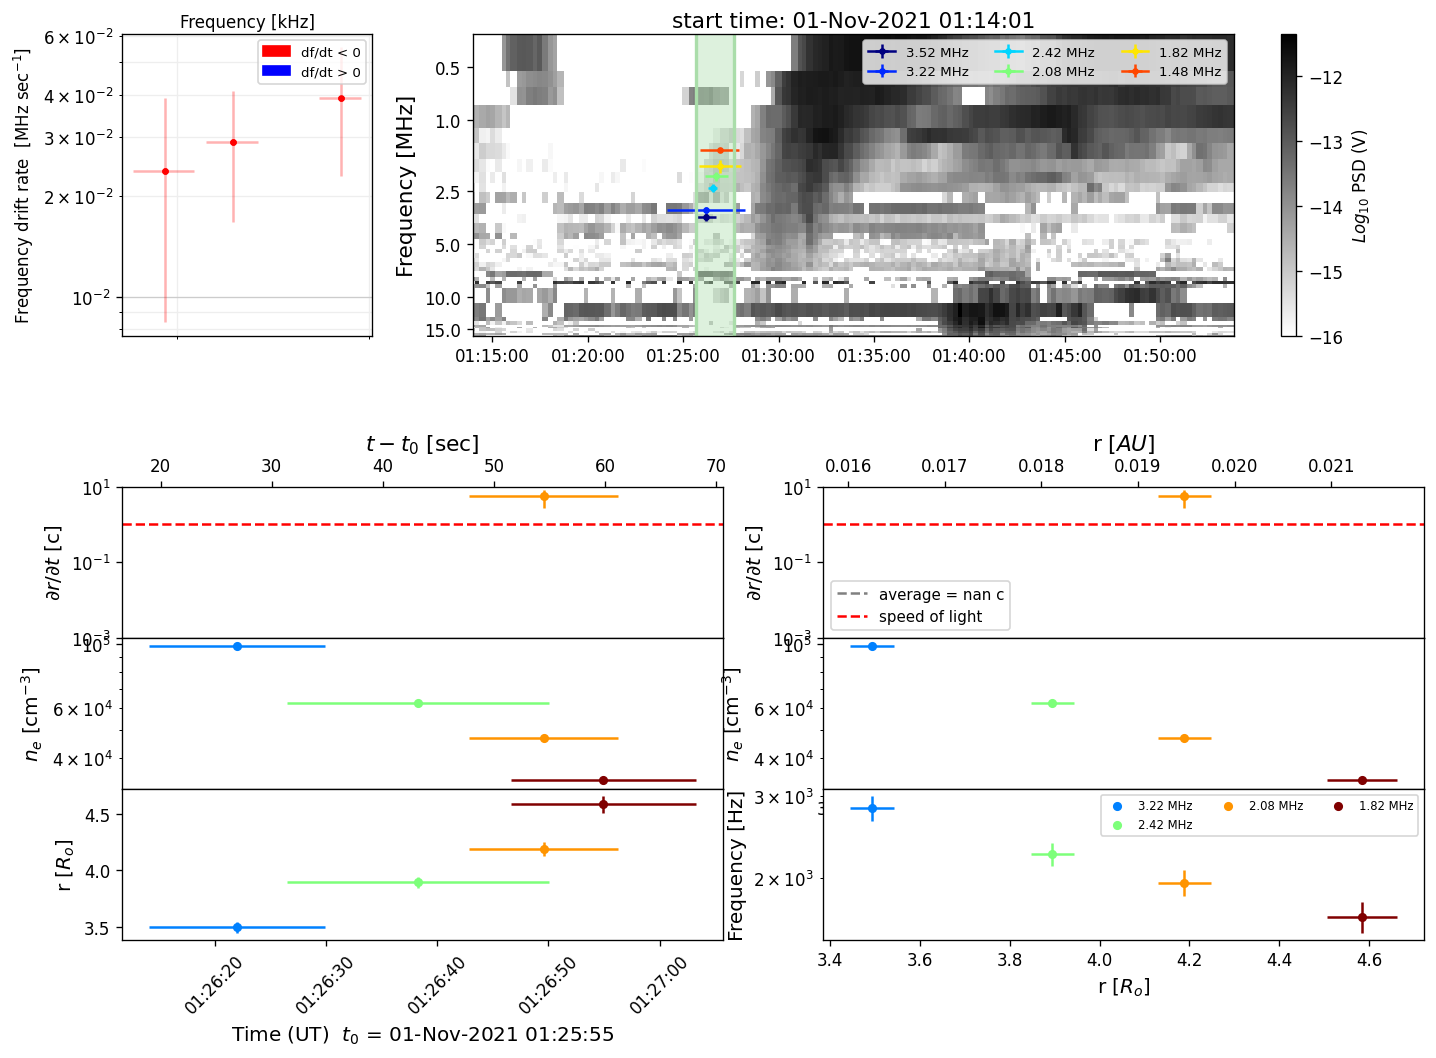

In [14]:
fit_interval1 = ["01-Nov-2021 01:25:40","01-Nov-2021 01:27:40"]
#fit_interval = ["01-Nov-2021 01:30:50","01-Nov-2021 01:32:20"]
#fit_interval2 = ["17-Jul-2021 05:12:38","17-Jul-2021 05:16:26"]
cf = freqdrift.rpw_fit_freq_peaks(rpw_psd,freqdrift.fit_func_gaussian,fit_interval1,frequency_range=[1000,4000])
k = freqdrift.rpw_freq_drifts(cf)
v = freqdrift.estimate_velocity(k,freqdrift.ne_from_r_leblanc)
plt.close()
freqdrift.rpw_plot_typeIII_diagnostics(rpw_psd,cf,k,v)

In [2]:
# 20NOV2020
# STIX files
#stx_L1file = "../STIX/stx_files/20210717/solo_L1A_stix-sci-xray-l1-2107170037_20210717T043515-20210717T053459_031085_V01.fits"
#stx_BKGfile =  "../STIX/stx_files/202107_BKG/solo_L1A_stix-sci-xray-l1-2107100004_20210710T230008-20210711T003708_031071_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202107/solo_L2_rpw-hfr-surv_20210717_V01.cdf" 

# time interval
dt_fmt = sololab.std_date_fmt
#19NOV2020 0600
start_time = "17-Jul-2021 04:34:00"
end_time = "17-Jul-2021 05:34:00"

# RPW BKG
start_bkg = "17-Jul-2021 04:34:00"
end_bkg = "17-Jul-2021 04:48:00"




# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]

time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

#l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                        freq_range=[0,17000],rpw_bkg_interval=bkg_range)





Extracting info:
  File:  solo_L2_rpw-hfr-surv_20210717_V01.cdf
  Type: RPW L2
  sensors:  (847761,) (0,)
  data cropped from  2021-07-17 04:34:00  to  2021-07-17 05:34:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 4875 5225 5475 5825 6175 6525 6875 7375 7975 8175 8575 9175 10025 11025 11375 12225 12475 13375 13725 14375 14925 15275 15625 16075 16325
  Creating mean bkg from  17-Jul-2021 04:34:00  to  17-Jul-2021 04:48:00 ...
  bkg done.


Estimated uncertainty:
  Time: 8.0 s
  Freq: between 25.0-500.0 kHz
Defining time reference...
 t0 =  17-Jul-2021 05:12:43
Fitting peaks for 21 frequencies between 425.0 kHz and 6875.0 kHz
Starting point ---------- frequency: 6875+-250 kHz   time: 17-Jul-2021 05:13:14
[20] 6875 kHz: Fit found!   t-t0: 30.85 s   Dif.: 0.00 s  Log10(RMSE): -13.74  Log10(S/N): 0.86
[19] 6525 kHz: Fit found!   t-t0: 29.85 s   Dif.: -1.01 s  Log10(RMSE): -13.61  Log10(S/N): 0.75
[18] 6175 kHz: Fit found!   t-t0: 30.36 s   Dif.: 0.51 s  Log10(RMSE): -13.68  Log10(S/N): 0.68
[17] 5825 kHz: Fit found!   t-t0: 23.60 s   Dif.: -6.76 s  Log10(RMSE): -13.82  Log10(S/N): 1.00
[16] 5475 kHz: Fit found!   t-t0: 23.04 s   Dif.: -0.56 s  Log10(RMSE): -13.57  Log10(S/N): 1.08
[15] 5225 kHz: Fit found!   t-t0: 24.08 s   Dif.: 1.04 s  Log10(RMSE): -13.76  Log10(S/N): 1.09
[14] 4875 kHz: Fit found!   t-t0: 21.59 s   Dif.: -2.49 s  Log10(RMSE): -13.40  Log10(S/N): 15.53
[13] 4525 kHz: Fit found!   t-t0: 29.55 s   Dif.: 7.96

/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/M2_AstroParis2021/InternshipLESIA/devrad/STIX_RPW_plot/RPW_STIX_pylab.py:562: RuntimeWarning: overflow encountered in double_scalars
  return (10**a) * np.exp(-(x-b)**2/( c**2)) + (10**d)
/home/localuser/Documents/M2_AstroParis2021/InternshipLESIA/devrad/STIX_RPW_plot/RPW_STIX_pylab.py:681: RuntimeWarning: overflow encountered in double_scalars
  snr = 10**(popt[0]-popt[3])


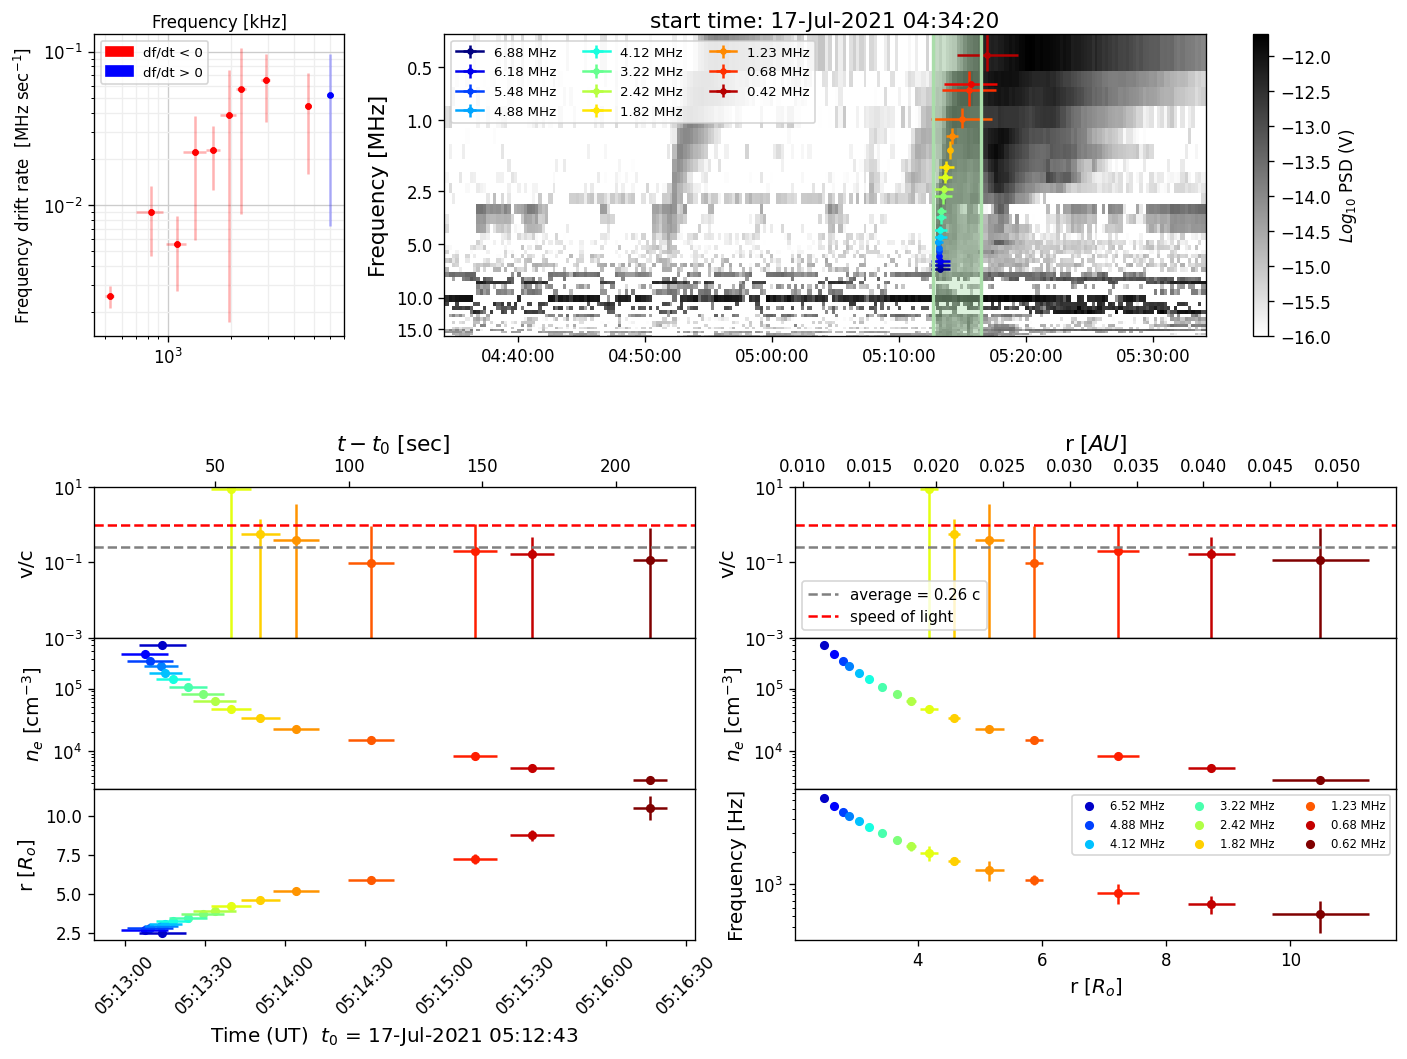

In [3]:
#fit_interval2= ["17-Jul-2021 04:51:29","17-Jul-2021 04:59:00"]
#fit_interval2 = ["17-Jul-2021 05:10:25","17-Jul-2021 05:12:58"]
fit_interval2 = ["17-Jul-2021 05:12:38","17-Jul-2021 05:16:26"]
#fit_interval2 = ["17-Jul-2021 05:17:38","17-Jul-2021 05:18:46"]
cf = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,fit_interval2,frequency_range=[400,7000])
k = sololab.rpw_freq_drifts(cf)
v = sololab.rpw_estimate_beam_velocity(k,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,cf,k,v)

Extracting info:
  File:  solo_L2_rpw-hfr-surv_20210717_V01.cdf
  Type: RPW L2
  sensors:  (847761,) (0,)
  data cropped from  2021-07-17 04:34:00  to  2021-07-17 05:34:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 4875 5225 5475 5825 6175 6525 6875 8575 9175 12475 13375 13725 14375 14925 15275 15625 16075 16325
  Creating mean bkg from  17-Jul-2021 04:34:00  to  17-Jul-2021 04:48:00 ...
  bkg done.
Estimated uncertainty:
  Time: 8.0 s
  Freq: between 25.0-1650.0 kHz
Defining time reference...
 t0 =  17-Jul-2021 05:12:43
Fitting peaks for 32 frequencies between 425.0 kHz and 16325.0 kHz
[31] 16325 kHz   : Not found
[30] 16075 kHz: Fit found!   t-t0: 62.54 s   Dif.: 62.54 s  Log10(RMSE): -13.64  Log10(S/N): 0.51
[29] 15625 kHz: Fit found!   t-t0: 58.48 s   Dif.: -4.06 s  Log10(RMSE): -13.33  Log10(S/N): 0.62
[28] 15275 kHz: Fit found!   t-t0: 58.99 s   Dif.: 0.51 s  Log10(RMSE): -13.34  Log10(S/N): 0.32
[27] 14925 kHz: Fit found!   t

/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/M2_AstroParis2021/InternshipLESIA/devrad/STIX_RPW_plot/RPW_STIX_pylab.py:562: RuntimeWarning: overflow encountered in double_scalars
  return (10**a) * np.exp(-(x-b)**2/( c**2)) + (10**d)
/home/localuser/Documents/M2_AstroParis2021/InternshipLESIA/devrad/STIX_RPW_plot/RPW_STIX_pylab.py:681: RuntimeWarning: overflow encountered in double_scalars
  snr = 10**(popt[0]-popt[3])


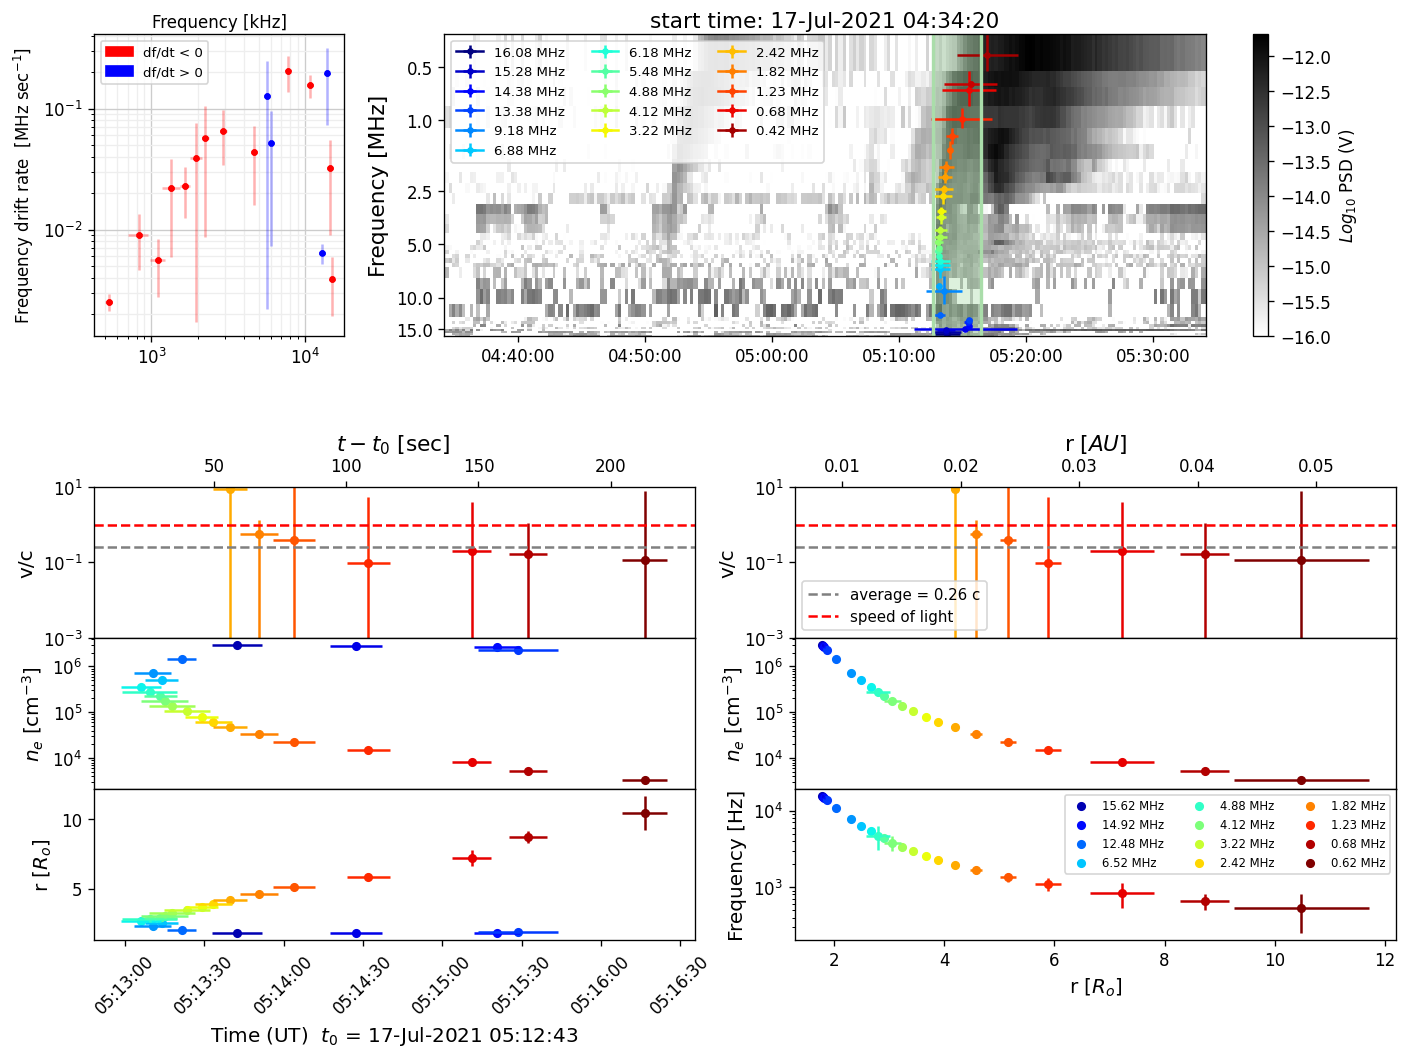

In [2]:
# 20NOV2020
# STIX files
#stx_L1file = "../STIX/stx_files/20210717/solo_L1A_stix-sci-xray-l1-2107170037_20210717T043515-20210717T053459_031085_V01.fits"
#stx_BKGfile =  "../STIX/stx_files/202107_BKG/solo_L1A_stix-sci-xray-l1-2107100004_20210710T230008-20210711T003708_031071_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202107/solo_L2_rpw-hfr-surv_20210717_V01.cdf" 

# time interval
dt_fmt = sololab.std_date_fmt
#19NOV2020 0600
start_time = "17-Jul-2021 04:34:00"
end_time = "17-Jul-2021 05:34:00"

# RPW BKG
start_bkg = "17-Jul-2021 04:34:00"
end_bkg = "17-Jul-2021 04:48:00"




# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]

time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

#l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                        freq_range=[0,17000],rpw_bkg_interval=bkg_range)



#fit_interval2= ["17-Jul-2021 04:51:29","17-Jul-2021 04:59:00"]
#fit_interval2 = ["17-Jul-2021 05:10:25","17-Jul-2021 05:12:58"]
fit_interval2 = ["17-Jul-2021 05:12:38","17-Jul-2021 05:16:26"]
#fit_interval2 = ["17-Jul-2021 05:17:38","17-Jul-2021 05:18:46"]
cf = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,fit_interval2,frequency_range=[400,17000])
k = sololab.rpw_freq_drifts(cf)
v = sololab.rpw_estimate_beam_velocity(k,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,cf,k,v) 

In [37]:
kkv=np.array(v["drdt"])[np.array(v["drdt"])>0]
kkv=kkv[kkv<1]

print(np.mean(kkv))
print(np.std(kkv))

0.11171536367186428
0.07527793019236048


In [35]:
kkv

array([0.25228126, 0.16864709, 0.04209315, 0.08634453, 0.07177859,
       0.04914757])

Estimated uncertainty:
  Time: 8.0 s
  Freq: between -275.0-1650.0 kHz
Defining time reference...
 t0 =  17-Jul-2021 05:12:43
Fitting peaks for 17 frequencies between 425.0 kHz and 5475.0 kHz
Starting point ---------- frequency: 5475+-175 kHz   time: 17-Jul-2021 05:13:06
[16] 5475 kHz: Fit found!   t-t0: 22.74 s   Dif.: 0.00 s  Log10(RMSE): -13.57  Log10(S/N): 1.05
[15] 5225 kHz: Fit found!   t-t0: 24.11 s   Dif.: 1.37 s  Log10(RMSE): -13.76  Log10(S/N): 1.10
[14] 4875 kHz: Fit found!   t-t0: 21.59 s   Dif.: -2.52 s  Log10(RMSE): -13.40  Log10(S/N): 15.53
[13] 4525 kHz: Fit found!   t-t0: 29.55 s   Dif.: 7.96 s  Log10(RMSE): -13.32  Log10(S/N): 16.12
[12] 4125 kHz: Fit found!   t-t0: 29.84 s   Dif.: 0.29 s  Log10(RMSE): -13.46  Log10(S/N): 14.88
[11] 3525 kHz: Fit found!   t-t0: 32.74 s   Dif.: 2.89 s  Log10(RMSE): -13.24  Log10(S/N): 14.80
[10] 3225 kHz: Fit found!   t-t0: 35.49 s   Dif.: 2.76 s  Log10(RMSE): -13.18  Log10(S/N): 22.47
[9] 2675 kHz: Fit found!   t-t0: 43.87 s   Dif.: 8

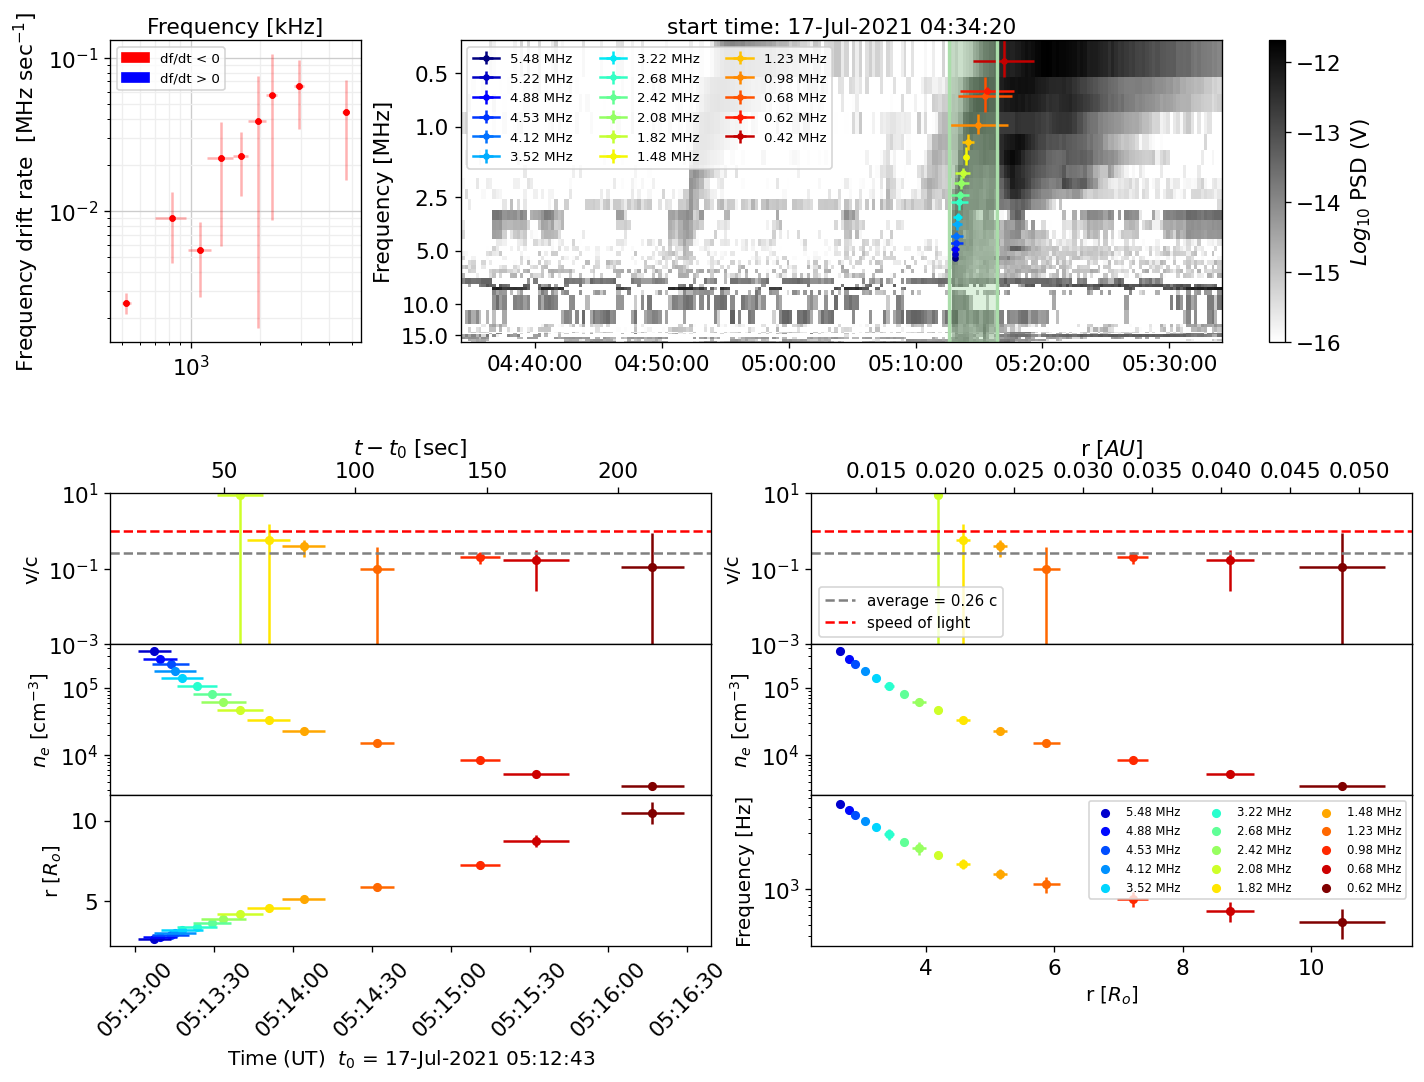

In [20]:
cf = freqdrift.rpw_fit_freq_peaks(rpw_psd,freqdrift.fit_func_gaussian,fit_interval2,frequency_range=[400,5800])
k = freqdrift.rpw_freq_drifts(cf)
v = freqdrift.estimate_velocity(k,freqdrift.ne_from_r_leblanc)
plt.close()
freqdrift.rpw_plot_typeIII_diagnostics(rpw_psd,cf,k,v)

In [36]:
cf["metadata"]

{}

In [26]:
from astropy.io import fits
hdul = fits.open(stx_L1file)

In [6]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SOLO/STIX'          / Telescope/Sensor name                          
INSTRUME= 'STIX    '           / Instrument name                                
OBSRVTRY= 'Solar Orbiter'      / Satellite name                                 
FILENAME= 'solo_L1A_stix-sci-xray-l1-2111010024_20211101T010049-20211101T02315&'
CONTINUE  '8_017507_V01.fits&'                                                  
CONTINUE  '' / FITS filename                                                    
DATE    = '2021-11-29T10:27:03.451' / FITS file creation date in UTC            
OBT_BEG = '0689043559:06549'                                                    
OBT_END = '0689049027:32155'

In [76]:
dists=freqdrift.r_from_freq([2075,4125,5820],freqdrift.ne_from_r_leblanc)
vs = [0.25,0.36,0.26]
c= 300000
v =1*c

conv = 1.437e-6
vro = conv*v
print(vro)
tim = [(dists[i]-1)/(conv*vs[i]*c) for i in range(len(vs))]
print(dists)
print(tim)
print(v)

0.4311
[4.056385216633036, 2.959871546566933, 2.5740924467156994]
[28.358944250828447, 12.628363788802119, 14.043613356848308]
300000


In [66]:

d = 1.95
maxt = d/vro
print(maxt)

4.523312456506611


In [59]:
vro*17.39

1.94917554

In [64]:
1.95/conv/c

4.523312456506611

In [4]:
freqdrift.r_from_freq([2075,4125,5820],freqdrift.ne_from_r_leblanc)

[4.056385216633036, 2.959871546566933, 2.5740924467156994]

In [3]:
rad = np.linspace(1,215,6000)
nefreq = freqdrift.ne_from_r_leblanc(rad)

freqs= freqdrift.freq_from_r(rad,freqdrift.ne_from_r_leblanc)
freqsl=np.linspace(425,16425,500)

Text(0, 0.5, 'Electron density [ cm$^{-3}$ ]')

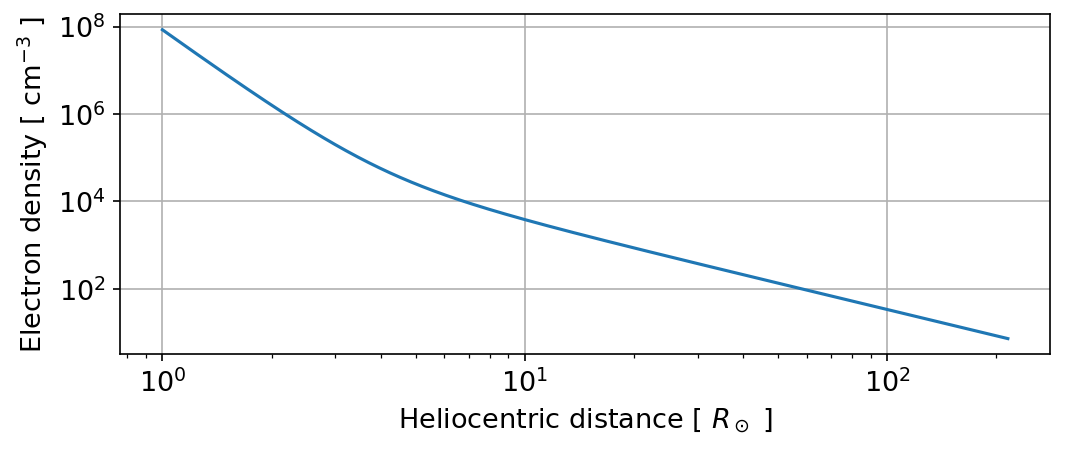

In [16]:
plt.figure(figsize=(8,3),dpi=150)
plt.plot(rad,nefreq)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel("Heliocentric distance [ $R_\odot$ ]")
plt.ylabel("Electron density [ cm$^{-3}$ ]")
#plt.axhline(425,c="grey",ls="--")
#plt.axhline(16425,c="grey",ls="--")

Text(0, 0.5, 'Frequency [ kHz ]')

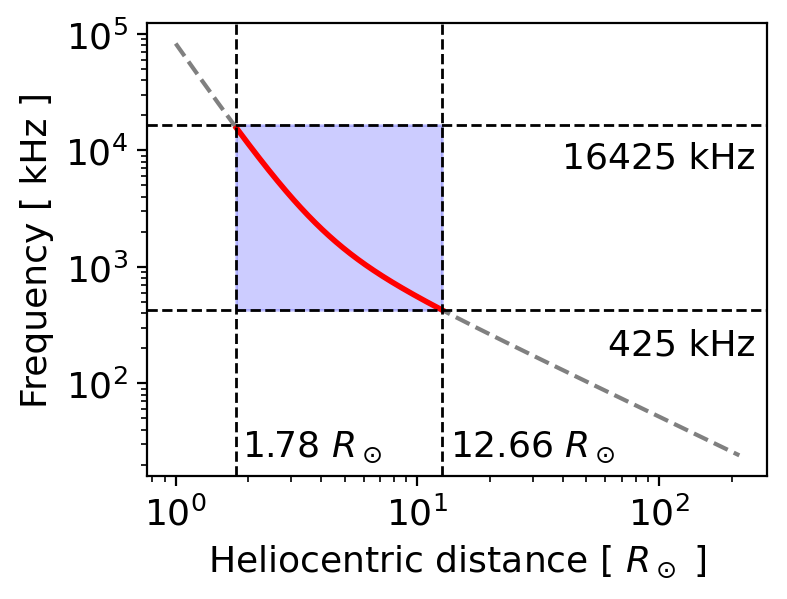

In [39]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(4,3),dpi=200)
ax=plt.gca()
plt.plot(rad,freqs,"grey",ls="--")

ii = np.logical_and(np.array(freqs)<=16425,np.array(freqs)>=425)
#plt.plot(np.array(rad)[ii],np.array(freqs)[ii],"r",lw=2,label="RPW detection range")

jj = np.logical_and(np.array(freqs)<=5825,np.array(freqs)>=425)
plt.plot(np.array(rad)[ii],np.array(freqs)[ii],"r",ls="-",lw=2,label="IP Type III (interval B) ")

plt.yscale('log')
plt.xscale('log')

rr=matplotlib.patches.Rectangle((np.array(rad)[ii][0],425.),np.array(rad)[ii][-1]-np.array(rad)[ii][0],16000.,color="b",alpha=0.2)
ax.add_patch(rr)

plt.axhline(425,c="k",ls="--",lw=1)
plt.axhline(16425,c="k",ls="--",lw=1)
plt.text(250,300,"425 kHz",c="k",va="top",ha="right")
plt.text(250,12000,"16425 kHz",c="k",va="top",ha="right")

plt.axvline(np.array(rad)[ii][0],c="k",ls="--",lw=1)
plt.text(np.array(rad)[ii][0]+0.1,20,"{:.2f} $R_\odot$".format(np.array(rad)[ii][0]),c="k",va="bottom",ha="left")

plt.axvline(np.array(rad)[ii][-1],c="k",ls="--",lw=1)
plt.text(np.array(rad)[ii][-1]+1,20,"{:.2f} $R_\odot$".format(np.array(rad)[ii][-1]),c="k",va="bottom",ha="left")





plt.xlabel("Heliocentric distance [ $R_\odot$ ]")
plt.ylabel("Frequency [ kHz ]")


In [111]:
print(np.array(rad)[ii][0],425,np.array(rad)[ii][-1]-np.array(rad)[ii][0],16000)

1.784797466244374 425 10.880146691115186 16000


In [40]:
np.array(freqs)[np.array(freqs)<=16425]

array([10305.08404198,  6754.01798814,  4775.07692136,  3580.56847073,
        2812.82600813,  2293.37571892,  1926.4059139 ,  1657.39059758,
        1453.77599908,  1295.3240196 ,  1169.00471617,  1066.16566774,
         980.90001059,   909.07294431,   847.72336168,   794.68605944,
         748.34734534,   707.48337901,   671.1510192 ,   638.61270629,
         609.28384359,   582.69532533,   558.46643684,   536.28497192,
         515.89244765,   497.07297058,   479.64475319,   463.45357802,
         448.36771012,   434.27389823,   421.07420312,   408.68346037,
         397.02723442,   386.04015631,   375.66456349,   365.84937951,
         356.5491853 ,   347.72344488,   339.33585606,   331.35380315,
         323.74789337,   316.49156223,   309.56073616,   302.93354283,
         296.59006146,   290.51210676,   284.68304119,   279.08761148,
         273.71180556,   268.54272715,   263.56848538,   258.77809739,
         254.16140224,   249.70898442,   245.41210595,   241.26264574,
      

In [108]:
np.array(rad)[ii][-1]-np.array(rad)[ii][0]

10.880146691115186